# Module 5: Introduction to Numpy

When it comes to doing numerical work, Python by itself is rather slow. By slow we mean compared to languages like C and Fortran, which benefit from being **compiled** languages in which a program is preprocessed into machine code by a compiler. Python by contrast is an **interpreted** language, in which each line in a program is fed to the Python interpreter in sequence, then executed. The flexiblity and ease of use that come with Python come at the cost of pure performance.

However, though Python code itself may be slow, Python can be used to run code that is written in a compiled language and already compiled. We will use a library (a.k.a., a Python *module*) that does exactly this underneath the hood to get fast performance for numerical operations on arrays.

In [1]:
import numpy as np

Importing a module is like taking a piece of equipment out of a storage locker and setting it up on a lab bench. Importing the name `numpy` makes all the functions and classes (object types) available to us. The core data structure that `numpy` provides is known as the `numpy` array:

## The Numpy Array 

In [2]:
somenums = np.array([1, 2, 3, 4])
print(somenums)

[1 2 3 4]


A numpy array looks superfically similar to a `list`, which is a builtin to Python. They are fundamentally different, however, in how they both work and how they exist in memory. `numpy` arrays don't store references to other objects, but instead point to contiguous blocks of memory in which each element is of exactly the same data type. For instance, we just made an array of 64 bit integers:

In [3]:
somenums.dtype

dtype('int64')

In [4]:
# this will give an array with a string dtype
np.array(['Han Solo', "Kylo Ren", 7])

array(['Han Solo', 'Kylo Ren', '7'], dtype='<U8')

In [5]:
# this will give an array of 64 bit floats
floats = np.array([63.3, -5.0, 1])
print(floats)

[63.3 -5.   1. ]


In [6]:
floats.dtype 

dtype('float64')

#### Arrays are fixed-size
* *not* a container of objects 
* **a single object of identically sized pieces of data** 
* cannot be resized

To add elements to an array, one must create a new array, using functions such as [np.hstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html) or [np.vstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) or more generally [np.concatenate()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html).

We typically **create new arrays at the desired size** using, for instance,
```python
a = np.zeros((100, 3))    # 100x3 array filled with zeroes
b = np.ones(1000)         # 1000x1 array with ones 
c = np.arange(101)        # 0, 1, 2, 3, ..., 99, 100
```

and then fill them via assignment
```python
b[0] = 42
```

or create them from an extensible container such as a list
```python
data = []
for k in range(10):
    data.append(k**2)
data = np.array(data)
```

## Array methods (or, arrays are objects)

`numpy` arrays are built for numerical operations, and doing them quickly. 

Since like everything in Python these are *objects*, they include built-in methods such as:

In [7]:
somenums.mean()

2.5

In [8]:
somenums.std()

1.118033988749895

and a whole plethora of others. You can get a view of what methods and attributes are part of an array's namespace with:

In [9]:
dir(somenums)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

or in the notebook, by typing the name of the array followed by a `.` and the tab key:

In [10]:
somenums.mean()

2.5

```
somenums.
```

Recall that you can also get the documentation for any function or method with a question mark at the end of the name:

In [11]:
somenums.mean?

## Multidimensionality, indexing, and slicing

`numpy` arrays can be of any dimensionality, not just 1-D. It's common to encounter 2-D arrays, and for illustration we'll look at the position of a particle in three dimensions with time:

The `create_position()` function is just a helper function that we will use throughout the notebook in order to quickly generate interesting data.

In [12]:
def create_position(nframes=10**6):
    """Get array of x, y, and z position of a particle with time.
    
    Parameters
    ----------
    nframes: int
        number of frames; more frames increases the resolution
        of the trajectory, but not its length
        
    Returns
    -------
    position : `nframes` x 3 array
        (x, y, z) position of the particle with time
        
    """
    # generate x, y, z positions
    x = np.cos(np.linspace(0, 20, nframes))
    y = 3 * np.sin(np.linspace(0, 10, nframes))
    z = -2 * np.sin(np.pi * np.linspace(0, 5, nframes))

    # put them all in a single array; this gives
    # an array with 3 rows and nframes columns
    position = np.array([x, y, z])

    # transposing puts the array into the [[x, y, z], [x, y, z], ...] shape
    return position.transpose()

(If you are curious what kind of trajectories this function generates, look at the end of this notebook in the [bonus section on even more matplotlib](#BONUS:-Even-more-matplotlib).)

Let's generate an array `position` to work with:

In [13]:
position = create_position()

In [14]:
position.shape

(1000000, 3)

Now say we wanted to examine the position of the particle in the very first frame (row), we could do:

In [15]:
position[0]

array([ 1.,  0., -0.])

to extract it. Notice that indexing starts at 0, as is the convention in Python.

What about the third frame?

In [16]:
position[2]

array([ 9.99999999e-01,  6.00000600e-05, -6.28319159e-05])

Indices are 0-based. Index 0 is the "first frame".

What if we wanted a bunch of frames, but only the index 5 through index 72? It should have 68 rows:

In [17]:
position[5:73].shape

(68, 3)

Notice the **slicing** notation. Remember, this should be read as

> "Get each row in the array starting from the row at index 5 up to and not including the row at index 73."

We could even coarse-grain by slicing out every fifth row in this range:

In [18]:
position[5:73:5].shape

(14, 3)

Now what if we wanted a specific *element* of the array? Indexing works for this too:

In [19]:
position[42, 1]

0.0012600012229571492

This is the y-position of the frame at index 42. 

NOTE: **The numpy indexing notation differs from Python indexing of nested lists**, which would look like `positions[42][1]` vs. `positions[42, 1]`.

Incidentally "list" indexing also works for numpy arrays but is less readable and slower, as we can demonstrate with the `%timeit` magic function of IPython/Jupyter:

In [20]:
%timeit position[42, 1]

135 ns ± 10 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [21]:
%timeit position[42][1]

267 ns ± 7.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


The first index/slice corresponds to the first *axis* of the array, which for a 2-D array corresponds to the rows. The second index/slice would then be the columns. If we had a 3-D array, indexing the first axis would yield 2-D arrays. If we had a 4-D array, indexing the first axis would yield 3-D arrays, and so on.

### Example: Numpy slicing

Obtain an array of the **mean of the x, y positions (separately)** from the frame at **index 10 to the frame at index 43** as a 1-D array.

We can do this by slicing both the first axis (rows) and the second axis (columns), then using the `mean` method of the resulting array. To only take a mean across the rows (a mean for each column), we must specify the `axis=0` keyword.

In [22]:
position[10:42, :2].mean(axis=0)

array([9.99999853e-01, 7.65000753e-04])

What if we wanted the smaller of the two numbers only?

In [23]:
position[10:43, :2].mean(axis=0).min()

0.000780000767676743

Since slicing and methods of arrays often yield arrays, you can chain operations in this way.

This is a *pythonic* way to work with these objects.

### ADVANCED: Fancy and boolean indexing

It's also possible to index arrays with lists of indices to select out; these can be repeated and in any order.

In [24]:
position[[2, 4, 7, -1, 2]]

array([[ 9.99999999e-01,  6.00000600e-05, -6.28319159e-05],
       [ 9.99999997e-01,  1.20000120e-04, -1.25663832e-04],
       [ 9.99999990e-01,  2.10000210e-04, -2.19911705e-04],
       [ 4.08082062e-01, -1.63206333e+00, -1.22464680e-15],
       [ 9.99999999e-01,  6.00000600e-05, -6.28319159e-05]])

We can also use arrays of booleans to get back arrays with items for which `True` was the value in the boolean array used:

In [25]:
(position[:, :2] > 2).any(axis=1)

array([False, False, False, ..., False, False, False])

We can use this array to get only the rows for which either the x or y position is greater than 2:

In [26]:
position[(position[:,:2] > 2).any(axis=1)].shape

(336428, 3)

Boolean arrays are useful for filtering data for rows of interest.

**Technical note**: fancy and boolean indexing like this generally gives back a new array instead of a *view* to the existing one. Slicing, by contrast, always gives a view. This matters when using indexing or slicing to alter the values in an array.

## Array arithmetic 

You can add, subtract, multiply, divide arrays, raise them to a power, and generally do all the arithmetic that you do with "normal" scalar data types (i.e., numbers).
```
a + b
a - b
a * b
a / b
a ** b
```

Let's start with simple example arrays, `ones` and `counts`:

In [27]:
ones = np.ones((4, 3))
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [28]:
counts = np.arange(4*3).reshape(4, 3)
counts

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

**Addition** gives

In [29]:
added = counts + ones
added

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

The addition is carried out **element-wise**:
```
added[i, j] = counts[i, j] + ones[i, j]
```
for the indices `0 ≤ i < 4` and `0 ≤ j < 3`.

Similarly, **subtraction** ...

In [30]:
counts - ones

array([[-1.,  0.,  1.],
       [ 2.,  3.,  4.],
       [ 5.,  6.,  7.],
       [ 8.,  9., 10.]])

**multiplication** (and **division**)

In [31]:
counts * ones

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

**Arithmetic with a scalar** (number) will *also* be performed **element-wise**. 

For example, multiplication:

In [32]:
twos = 2 * ones
twos

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

or subtraction with a scalar

In [33]:
counts - 5

array([[-5, -4, -3],
       [-2, -1,  0],
       [ 1,  2,  3],
       [ 4,  5,  6]])

**Raising to a power** also operates on arrays:

In [34]:
counts**twos

array([[  0.,   1.,   4.],
       [  9.,  16.,  25.],
       [ 36.,  49.,  64.],
       [ 81., 100., 121.]])

You can even raise a scalar by an array and get back an array:

In [35]:
5**twos

array([[25., 25., 25.],
       [25., 25., 25.],
       [25., 25., 25.],
       [25., 25., 25.]])

Numpy contains the [np.power()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html) function that provides more control than the standard `**` operator, but for most cases, it just gives the same functionality:

In [36]:
np.power(counts, twos)

array([[  0.,   1.,   4.],
       [  9.,  16.,  25.],
       [ 36.,  49.,  64.],
       [ 81., 100., 121.]])

**REMINDER**:

Note that multiplication between two arrays is **not** the same as matrix multiplcation or taking inner ("dot") products of vectors. **Arithmetic operations are element-wise.**

In [37]:
np.array([0, -1, 10]) * np.array([3, 5, -1])

array([  0,  -5, -10])

 But there is a method for doing matrix multiplication:

In [38]:
np.dot(np.array([0, -1, 10]), np.array([3, 5, -1]))

-15

And more linear algebra functions can be found in the [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) module.

## Thinking in arrays 

Say we wanted to displace our particle a full 5 units in each of the x, y, and z directions. 

Let's use our 1 Million positions again:

In [39]:
position = create_position()

You might be used to writing nested loops like this one to achieve this:

In [40]:
%%time
for i in range(position.shape[0]):
    for j in range(position.shape[1]):
        position[i, j] += 5

CPU times: user 2.38 s, sys: 39.4 ms, total: 2.42 s
Wall time: 2.65 s


(We use the `%%time` magic to get the time for a whole code block.)

But one of the main points of `numpy` is performance, so we'd do better to spend as little time in an operation running through the Python interpreter, which is the case in the above loop. Instead we can do:

In [41]:
position = create_position()

In [42]:
%%time
position += 5

CPU times: user 4.53 ms, sys: 1.24 ms, total: 5.76 ms
Wall time: 4.25 ms


It is also *much simpler* to read!

Speed-up for using array operations instead of `for` loops:

In [63]:
2.38 / 4.53e-3

525.3863134657836

On my laptop the difference in speed is about a factor of 500 (you might see speed-ups on the order of 100 to 1000). The larger the array the more pronounced the difference in speed will be, too. The general rule when using `numpy` is to try and put what you're trying to do in terms of operations on whole arrays (or slices of them). 

**Avoid Python loops unless absolutely necessary.**

### ADVANCED: array arithmetic with *broadcasting*


[Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) is a powerful capability of numpy to perform arithmetic between a smaller array (or scalar) and a larger array in such a way that the smaller array is "copied" or "stretched" as often as needed to "cover" the bigger array.

For example, the scalar multiplication between the array `bigger`

In [44]:
bigger = np.arange(4)
bigger

array([0, 1, 2, 3])

and the scalar 5

In [45]:
bigger * 5

array([ 0,  5, 10, 15])

really does the following (element-wise!) calculation:

In [46]:
bigger * np.array([5, 5, 5, 5]) 

array([ 0,  5, 10, 15])

i.e., the scalar 5 was *stretched* into an array of the appropriate shape (length 4) to allow the element-wise operation with the length 4 array `bigger`.

This stretching or *broadcasting* is performed automatically by numpy (and is fast).

Broadcasting also works with higher dimensional arrays. For example, add `[1, 0, -1]` to our `counts` array so that each row is updated:

In [47]:
counts

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [48]:
counts + np.array([1, 0, -1])

array([[ 1,  1,  1],
       [ 4,  4,  4],
       [ 7,  7,  7],
       [10, 10, 10]])

**Example:**
Rescale (multiply) the y-positions by 2 and displace the x and z positions by 3 and -100, respectively.

There are a lot of ways to do this, but the most succinct way is to take advantage of *broadcasting*. That is, doing:

In [49]:
position = create_position()
position[:3]

array([[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 1.00000000e+00,  3.00000300e-05, -3.14159580e-05],
       [ 9.99999999e-01,  6.00000600e-05, -6.28319159e-05]])

In [50]:
position = position * np.array([1, 2, 1]) + np.array([3, 0, -100])

In [51]:
position[:3]

array([[ 4.00000000e+00,  0.00000000e+00, -1.00000000e+02],
       [ 4.00000000e+00,  6.00000600e-05, -1.00000031e+02],
       [ 4.00000000e+00,  1.20000120e-04, -1.00000063e+02]])

`numpy` will take the 3-element, 1-D arrays here and apply them to whole columns in `position`. Note that we already took advantage of broadcasting rules in a way, since multiplying an array by a scalar is the same as multiplying the array by an array of equal shape with all elements equal to the scalar.

## Universal functions ("ufuncs") 

*Universal functions* (or [ufuncs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) for short) are functions that **operate on whole arrays** in an element-wise fashion and return an array of the same shape as the input array.

Compare what we did so far in order to plot the sine function: We had to explicitly loop over all `x` values to create a list of `y` values:

In [52]:
import math

a, b, num = -4*math.pi, 4*math.pi, 100
X = [(b-a)/(num-1)*i + a for i in range(100)]  # our phy194.linspace()

Y = [math.sin(x) for x in X]

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

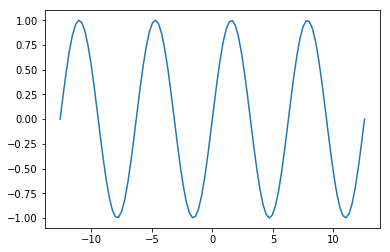

In [54]:
plt.plot(X, Y)

With **numpy** this the code gets a lot easier (and more readable!):

In [55]:
X = np.linspace(-4*np.pi, 4*np.pi, num=100)    # use numpy's linspace() function!
Y = np.sin(X)

Note how [`np.sin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) works: it takes the **array** `X` as input, **operates on it element-wise** and returns a new **array** `Y`. This looks exactly like the mathematics…
$$
y = \sin(x)
$$
It does not get simpler and more readable.

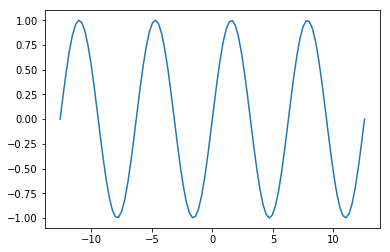

In [56]:
plt.plot(X, Y)

### ufuncs summary

* ufuncs perform **element-wise** operations on arrays
* To get ufuncs, you need to use functions from the `numpy` module
  * functions from `math` are *not* able to operate on arrays
  * write your own ufuncs – this is easy when you can build them from existing ufuncs with arithmetic
* Use ufuncs whenever you can:
  * fast
  * readable (which means fewer opportunities to make mistakes and easier to debug)  
* Use `np.linspace()` and `np.arange()` to quickly create arrays of values to operate on.


# BONUS: Even more matplotlib 

If you want to see what the `coordinates` from [create_position()](#Multidimensionality,-indexing,-and-slicing) look like, read on:

`matplotlib` is said to make easy things easy and hard things possible when it comes to plotting. Let's make a three-panel plot giving the x, y, and z position as a function of frame.

In [57]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')

In [58]:
%matplotlib inline

Create our fake trajectory:

In [59]:
position = create_position()

... and plot:

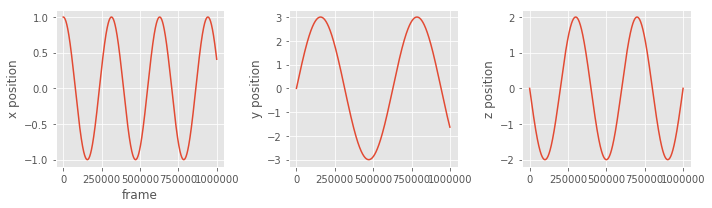

In [60]:
fig = plt.figure(figsize=(10,3))

# make an axis object for the figure, each with a different position
# on a grid that has 1 row and 3 columns of axes
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot the x position
ax1.set_ylabel('x position')
ax1.set_xlabel('frame')
ax1.plot(position[:, 0])

# plot the y position
ax2.set_ylabel('y position')
ax1.set_xlabel('frame')
ax2.plot(position[:, 1])

# plot the z position
ax3.set_ylabel('z position')
ax1.set_xlabel('frame')
ax3.plot(position[:, 2])

fig.tight_layout()

There's plenty more we could do with this to make it prettier. For a primer on making visually appealing and informative plots, check out [this notebook](https://github.com/Becksteinlab/making-prettier-plots/blob/master/Making%20better%20plots.ipynb).

### 3D plotting
Matplotlib has [basic 3D capabilities](http://matplotlib.org/1.3.1/mpl_toolkits/mplot3d/tutorial.html).

In [61]:
%matplotlib inline

(You can also try `%matplotlib notebook` or `%matplotlib ipympl` and if you are lucky, you will be able to get an interactive 3D graphic. However, that does not always seem to work.)

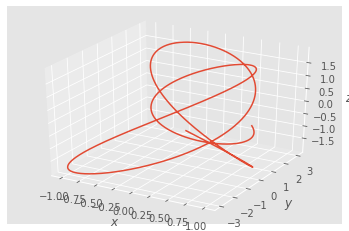

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
x, y, z = position.transpose()
ax.plot(x, y, z)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$");